# Portfolio project: are GDP and life expectancy related? 

In this project we will compare the life expectancy of six different countries in comparison to their GDP.
1. How does the life expectancy evolve in each country?
2. How does GDP evolves in each country?
3. What is the average life expectancy in each country? 
4. How does the average life expectancy relate to the GDP?

In [14]:
# import libraries
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#general information about the dataset
df = pd.read_csv("all_data.csv")
print(df.head())
print(df.describe())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13


In [16]:
#renaming columns to make it easier
df = df.rename(columns={'Country': 'country'})
df = df.rename(columns ={'Year': 'year'})
df = df.rename(columns ={'Life expectancy at birth (years)': 'life_expectancy'})
print(df.head())

#investigating which countries and years the database contains
print(df.country.unique())
print(df.year.unique)
df.replace('United States of America', 'USA', inplace=True)
print(df.country.unique())

  country  year  life_expectancy           GDP
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
<bound method Series.unique of 0     2000
1     2001
2     2002
3     2003
4     2004
      ... 
91    2011
92    2012
93    2013
94    2014
95    2015
Name: year, Length: 96, dtype: int64>
['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']


From this we can deduct multiple things: 
- There are six countries in the dataset: Chile, China, Germany, Mexico, USA and Zimbabwe.
- The dataset looks at data from 2000 to 2015;
- The average life expectancy of all countries is 72.9;
- The average GDP is 3.880499e+12; 
- The minimum and maximum age are 44.3 and 81;

In [17]:
# calculating the averages for each country
dfMeans = df.drop("year", axis = 1).groupby("country").mean().reset_index()
dfMeans

,country,life_expectancy,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,USA,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


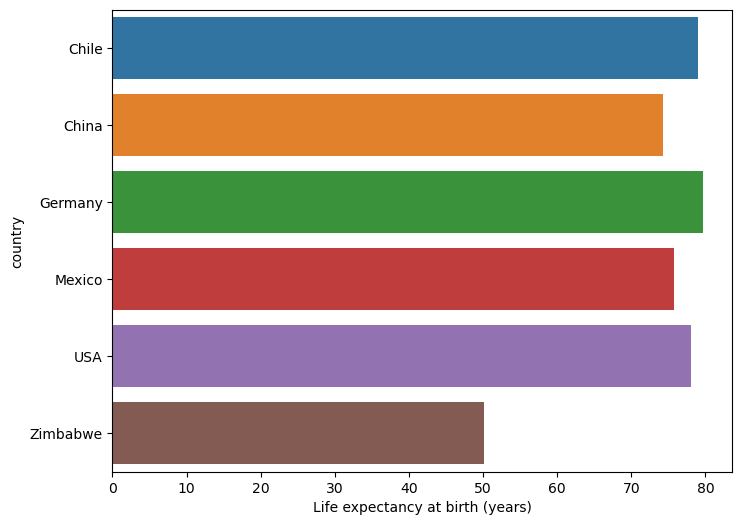

In [18]:
# looking at age
plt.figure(figsize=(8,6))
sns.barplot(x="life_expectancy", y="country", data=dfMeans)
plt.xlabel("Life expectancy at birth (years)");

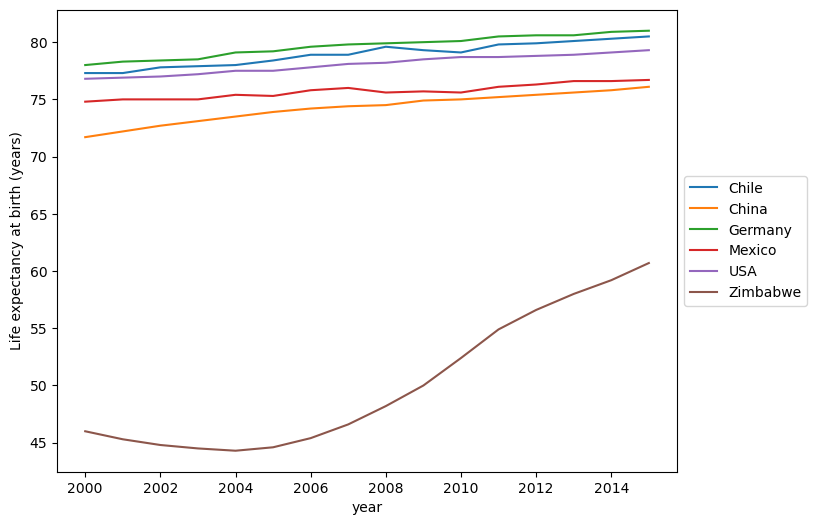

In [19]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.year, y=df.life_expectancy, hue=df.country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (years)");

In this graph, we cannot see anything for Zimbabwe. The graph is also very small for Chile


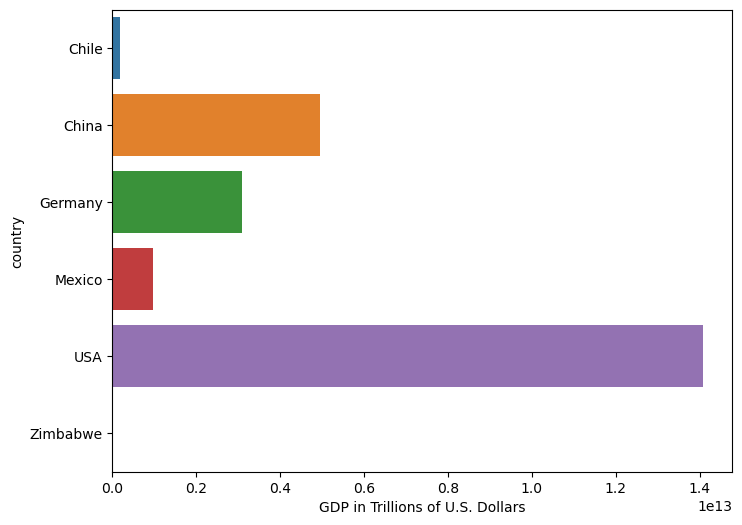

In [20]:
# looking at the GDP
plt.figure(figsize=(8,6))
sns.barplot(x="GDP", y="country", data=dfMeans)
plt.xlabel("GDP in Trillions of U.S. Dollars");
print("In this graph, we cannot see anything for Zimbabwe. The graph is also very small for Chile")

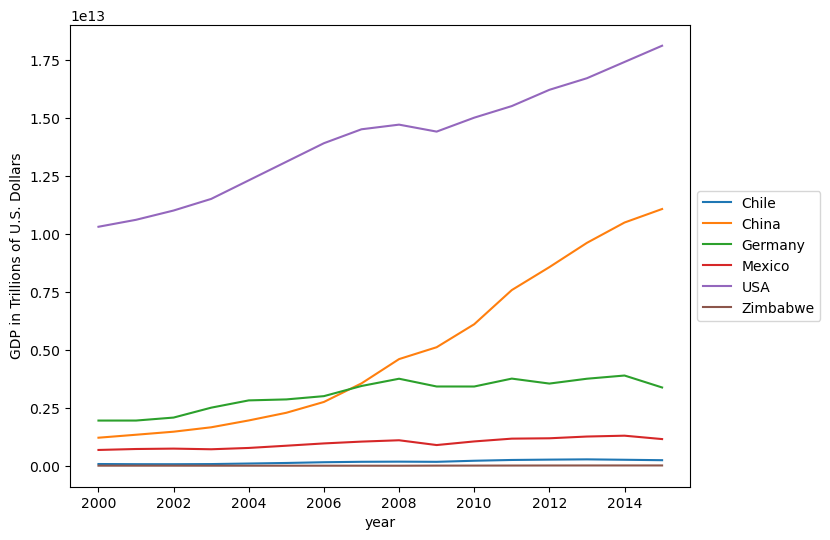

In [21]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.year, y=df.GDP, hue=df.country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars");

From this graph, we cannot see if there is any growth in Zimbabwe, Chile and Mexico

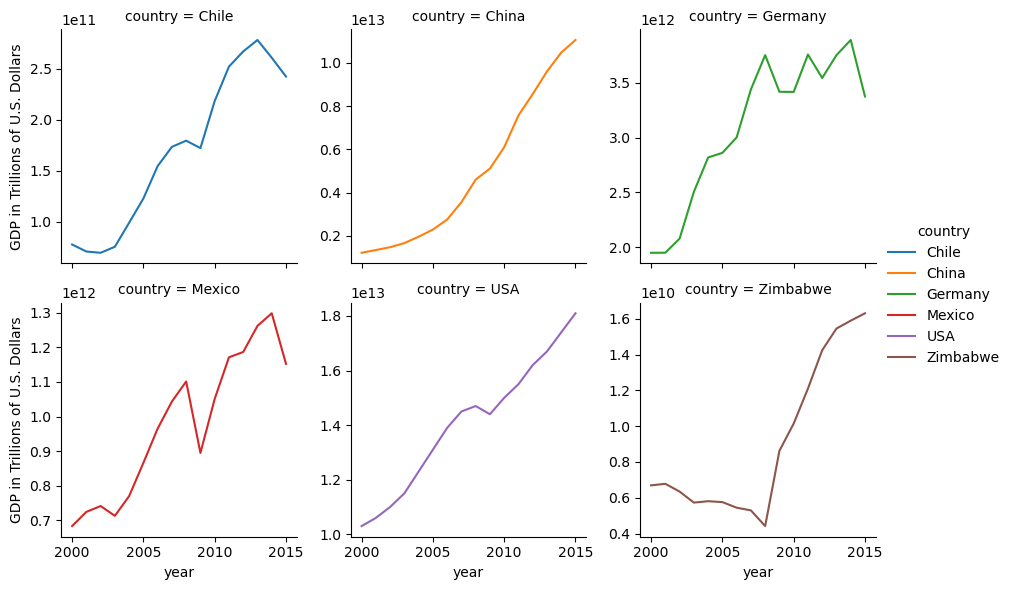

In [22]:
graphGDP = sns.FacetGrid(df, col="country", col_wrap = 3, 
                      hue = "country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"year","GDP")
         .add_legend()
         .set_axis_labels("year","GDP in Trillions of U.S. Dollars"))

graphGDP;

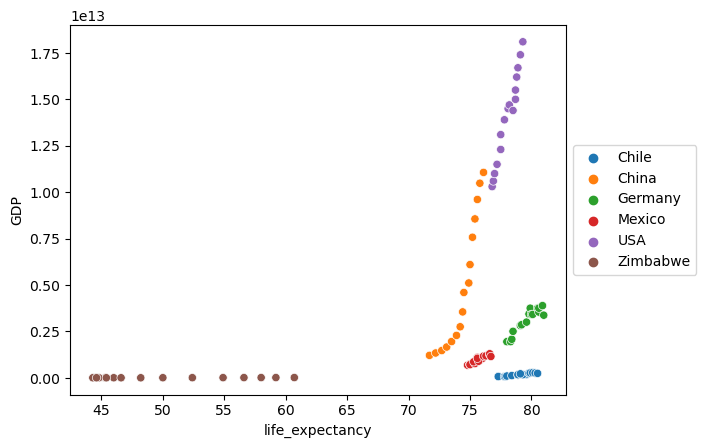

In [23]:
#looking for correlation between life expectancy and GDP
sns.scatterplot(x=df.life_expectancy, y=df.GDP, hue=df.country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);


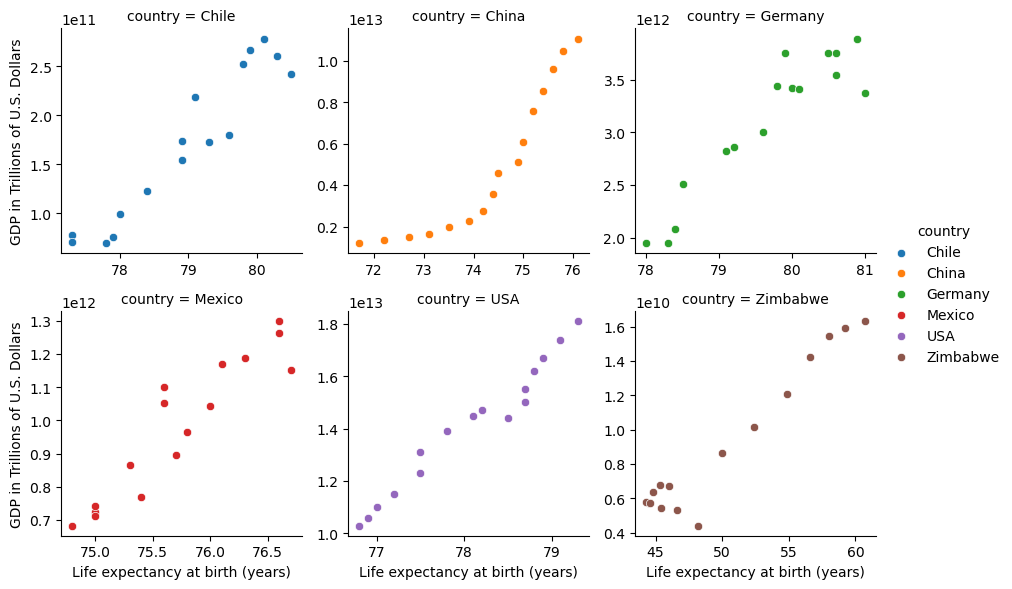

In [24]:
graph = sns.FacetGrid(df, col = "country", col_wrap=3,
                      hue = "country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"life_expectancy", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));



## Answers
### 1. How does the life expectancy evolve in each country?
We can see that in each country, the life expectancy grows over the years. Sometimes there are small dips where the life expectancy goes down, with the biggest one in Zimbabwe around 2004.

### 2. How does GDP evolves in each country?
We can see that in each country, the GDP grows over the years. Sometimes there are dips, like for Mexico in 2009 and 2015 and for Zimbabwe in 2007. 

### 3. What is the average life expectancy in each country? 
Almost each country has a higher life expectancy than 72.8 years: Germany has the highest life expectancy with almost 80 years, followed by Chile and USA. Mexico has a life expectancy of almost 75 years, while China has one of 74 years.
However, Zimbabwe has only an average life expectancy of 50, which grew to 60 years in 2015 (this is a growth of 120%).

### 4. How does the average life expectancy relate to the GDP?
The life expectancy of citizens is clearly related to the GDP of the country they life in. As the GDP grows, the life expectancy grows as well. This is clearly illustrated by the lowered life expectancy in Mexico and Zimbabwe resulting from a dip in the GDP. 